<a href="https://colab.research.google.com/github/dmahoner/472_week2_workshop/blob/main/Lab_2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1

In [ ]:
# Import necessary libraries
import pandas as pd
from google.colab import files

#UpLoad dataset
uploaded = files.upload()

#Load data set
file_name = "Lab2.xlsx"
df.head()


Saving Lab2.xlsx to Lab2 (2).xlsx


,Number,Biomass,TP,TemP,Time (min),PS,BET,PV,C,H,N,O,Qm (mg/g)
0,1.0,Waste sludge (paper),Citalopram,315,150.0,9.82,3.43,0.02,30.84,2.14,0.43,20.32,4.4
1,NaN,Waste sludge (paper),Citalopram,600,10.0,1.37,94.39,0.06,30.69,0.96,0.32,20.41,3.8
2,NaN,Waste sludge (paper),Citalopram,800,10.0,1.37,120.86,0.08,28.81,0.47,0.33,19.29,8.5
3,NaN,Waste sludge (Biological),Citalopram,800,150.0,1.41,209.12,0.13,27.05,0.82,0.33,9.73,19.6
4,NaN,Waste sludge (Biological),Citalopram,800,10.0,3.69,10.82,0.02,35.35,0.72,2.47,2.01,4.3


Step 2

In [ ]:
#Check for missing data
missing_data = df.isnull().sum()

#Display columns with missing data
missing_data[missing_data > 0]
df_cleaned = df.dropna()

missing_data = df.isnull().sum()

#Display columns with missing data
missing_data[missing_data > 0]
df_cleaned = df.dropna()
df['PS'].fillna(df['PS'].mean(), inplace=True)
df['PV'].fillna(df['PV'].mean(), inplace=True)
df['C'].fillna(df['C'].mean(), inplace=True)
df['H'].fillna(df['H'].mean(), inplace=True)


Step 3

In [ ]:
# Import necessary libraries
import pandas as pd
from google.colab import files

#UpLoad dataset
uploaded = files.upload()

#Load data set
file_name = "Lab2.xlsx"
df = pd.read_excel(file_name) # Create a DataFrame named df by reading the Excel file.
df.head()

TypeError: 'NoneType' object is not subscriptable

Step 4

In [ ]:
#Identical Categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

#Display catagorical columns
categorical_columns

Index(['Biomass', 'TP', 'N', 'Qm (mg/g)'], dtype='object')

Step 5

In [ ]:
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
#Display the first fe rows of the encoed dataset
df_encoded.head()

,Number,TemP,Time (min),PS,BET,PV,C,H,O,Biomass_Alfalfa,...,Qm (mg/g)_122.844,Qm (mg/g)_147.9,Qm (mg/g)_157.69,Qm (mg/g)_160.3,Qm (mg/g)_167.5,Qm (mg/g)_187.313,Qm (mg/g)_205,Qm (mg/g)_231.14,Qm (mg/g)_1.39,Qm (mg/g)_238.10
0,1.0,315,150.0,9.82,3.43,0.02,30.84,2.14,20.32,False,...,False,False,False,False,False,False,False,False,False,False
1,NaN,600,10.0,1.37,94.39,0.06,30.69,0.96,20.41,False,...,False,False,False,False,False,False,False,False,False,False
2,NaN,800,10.0,1.37,120.86,0.08,28.81,0.47,19.29,False,...,False,False,False,False,False,False,False,False,False,False
3,NaN,800,150.0,1.41,209.12,0.13,27.05,0.82,9.73,False,...,False,False,False,False,False,False,False,False,False,False
4,NaN,800,10.0,3.69,10.82,0.02,35.35,0.72,2.01,False,...,False,False,False,False,False,False,False,False,False,False


Step 6

In [ ]:
# assuming 'target'_column is the name of your target variable
x = df_encoded.drop('PS', axis=1)
y= df_encoded['PS']

#Display the firsst few rows of x and y
x.head(), y.head()

(   Number  TemP  Time (min)     BET    PV      C     H      O  \
 0     1.0   315       150.0    3.43  0.02  30.84  2.14  20.32   
 1     NaN   600        10.0   94.39  0.06  30.69  0.96  20.41   
 2     NaN   800        10.0  120.86  0.08  28.81  0.47  19.29   
 3     NaN   800       150.0  209.12  0.13  27.05  0.82   9.73   
 4     NaN   800        10.0   10.82  0.02  35.35  0.72   2.01   
 
    Biomass_Alfalfa  Biomass_Biosolids from muncipal waste  ...  \
 0            False                                  False  ...   
 1            False                                  False  ...   
 2            False                                  False  ...   
 3            False                                  False  ...   
 4            False                                  False  ...   
 
    Qm (mg/g)_122.844  Qm (mg/g)_147.9  Qm (mg/g)_157.69  Qm (mg/g)_160.3  \
 0              False            False             False            False   
 1              False            False      

Step 7

In [ ]:
#display summary statistics
summary_statistics = df.describe()
print(summary_statistics)

encoded_column = [col for col in df_encoded.columns if col not in df. columns]
print("One hot encoded columns")
print(encoded_column)
df_no_encoding = df_encoded.drop(columns=encoded_column)

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
sns.heatmap(df_no_encoding.corr(), annot=True, cmap='coolwarm', linewidth=.5 )
plt.title('Heat Map of correlation matrix (Excludinf One-Hot encoded Data)')
plt.show

          Number        TemP  Time (min)          PS          BET         PV  \
count  36.000000   86.000000   86.000000   86.000000    86.000000  86.000000   
mean   18.500000  566.453488  151.347287   13.908847   191.444442   0.152331   
std    10.535654  170.921148  126.607738   38.729014   298.769825   0.179817   
min     1.000000  300.000000    0.100000    1.320000     0.479000   0.001000   
25%     9.750000  450.000000   60.000000    2.910000     7.100000   0.020000   
50%    18.500000  500.000000  120.000000    4.440000    59.090000   0.100000   
75%    27.250000  700.000000  150.000000    9.865000   295.500000   0.223750   
max    36.000000  950.000000  480.000000  213.290000  1838.860000   1.030000   

               C          H          O  
count  86.000000  86.000000  83.000000  
mean   57.293855   1.927890  16.469048  
std    20.035848   1.609467  11.025043  
min     9.460000   0.000000   0.670000  
25%    42.192500   0.860000  10.100000  
50%    58.660000   1.685000  14.0

NameError: name 'df_encoded' is not defined

PLotting a pair plot

<function matplotlib.pyplot.show(close=None, block=None)>

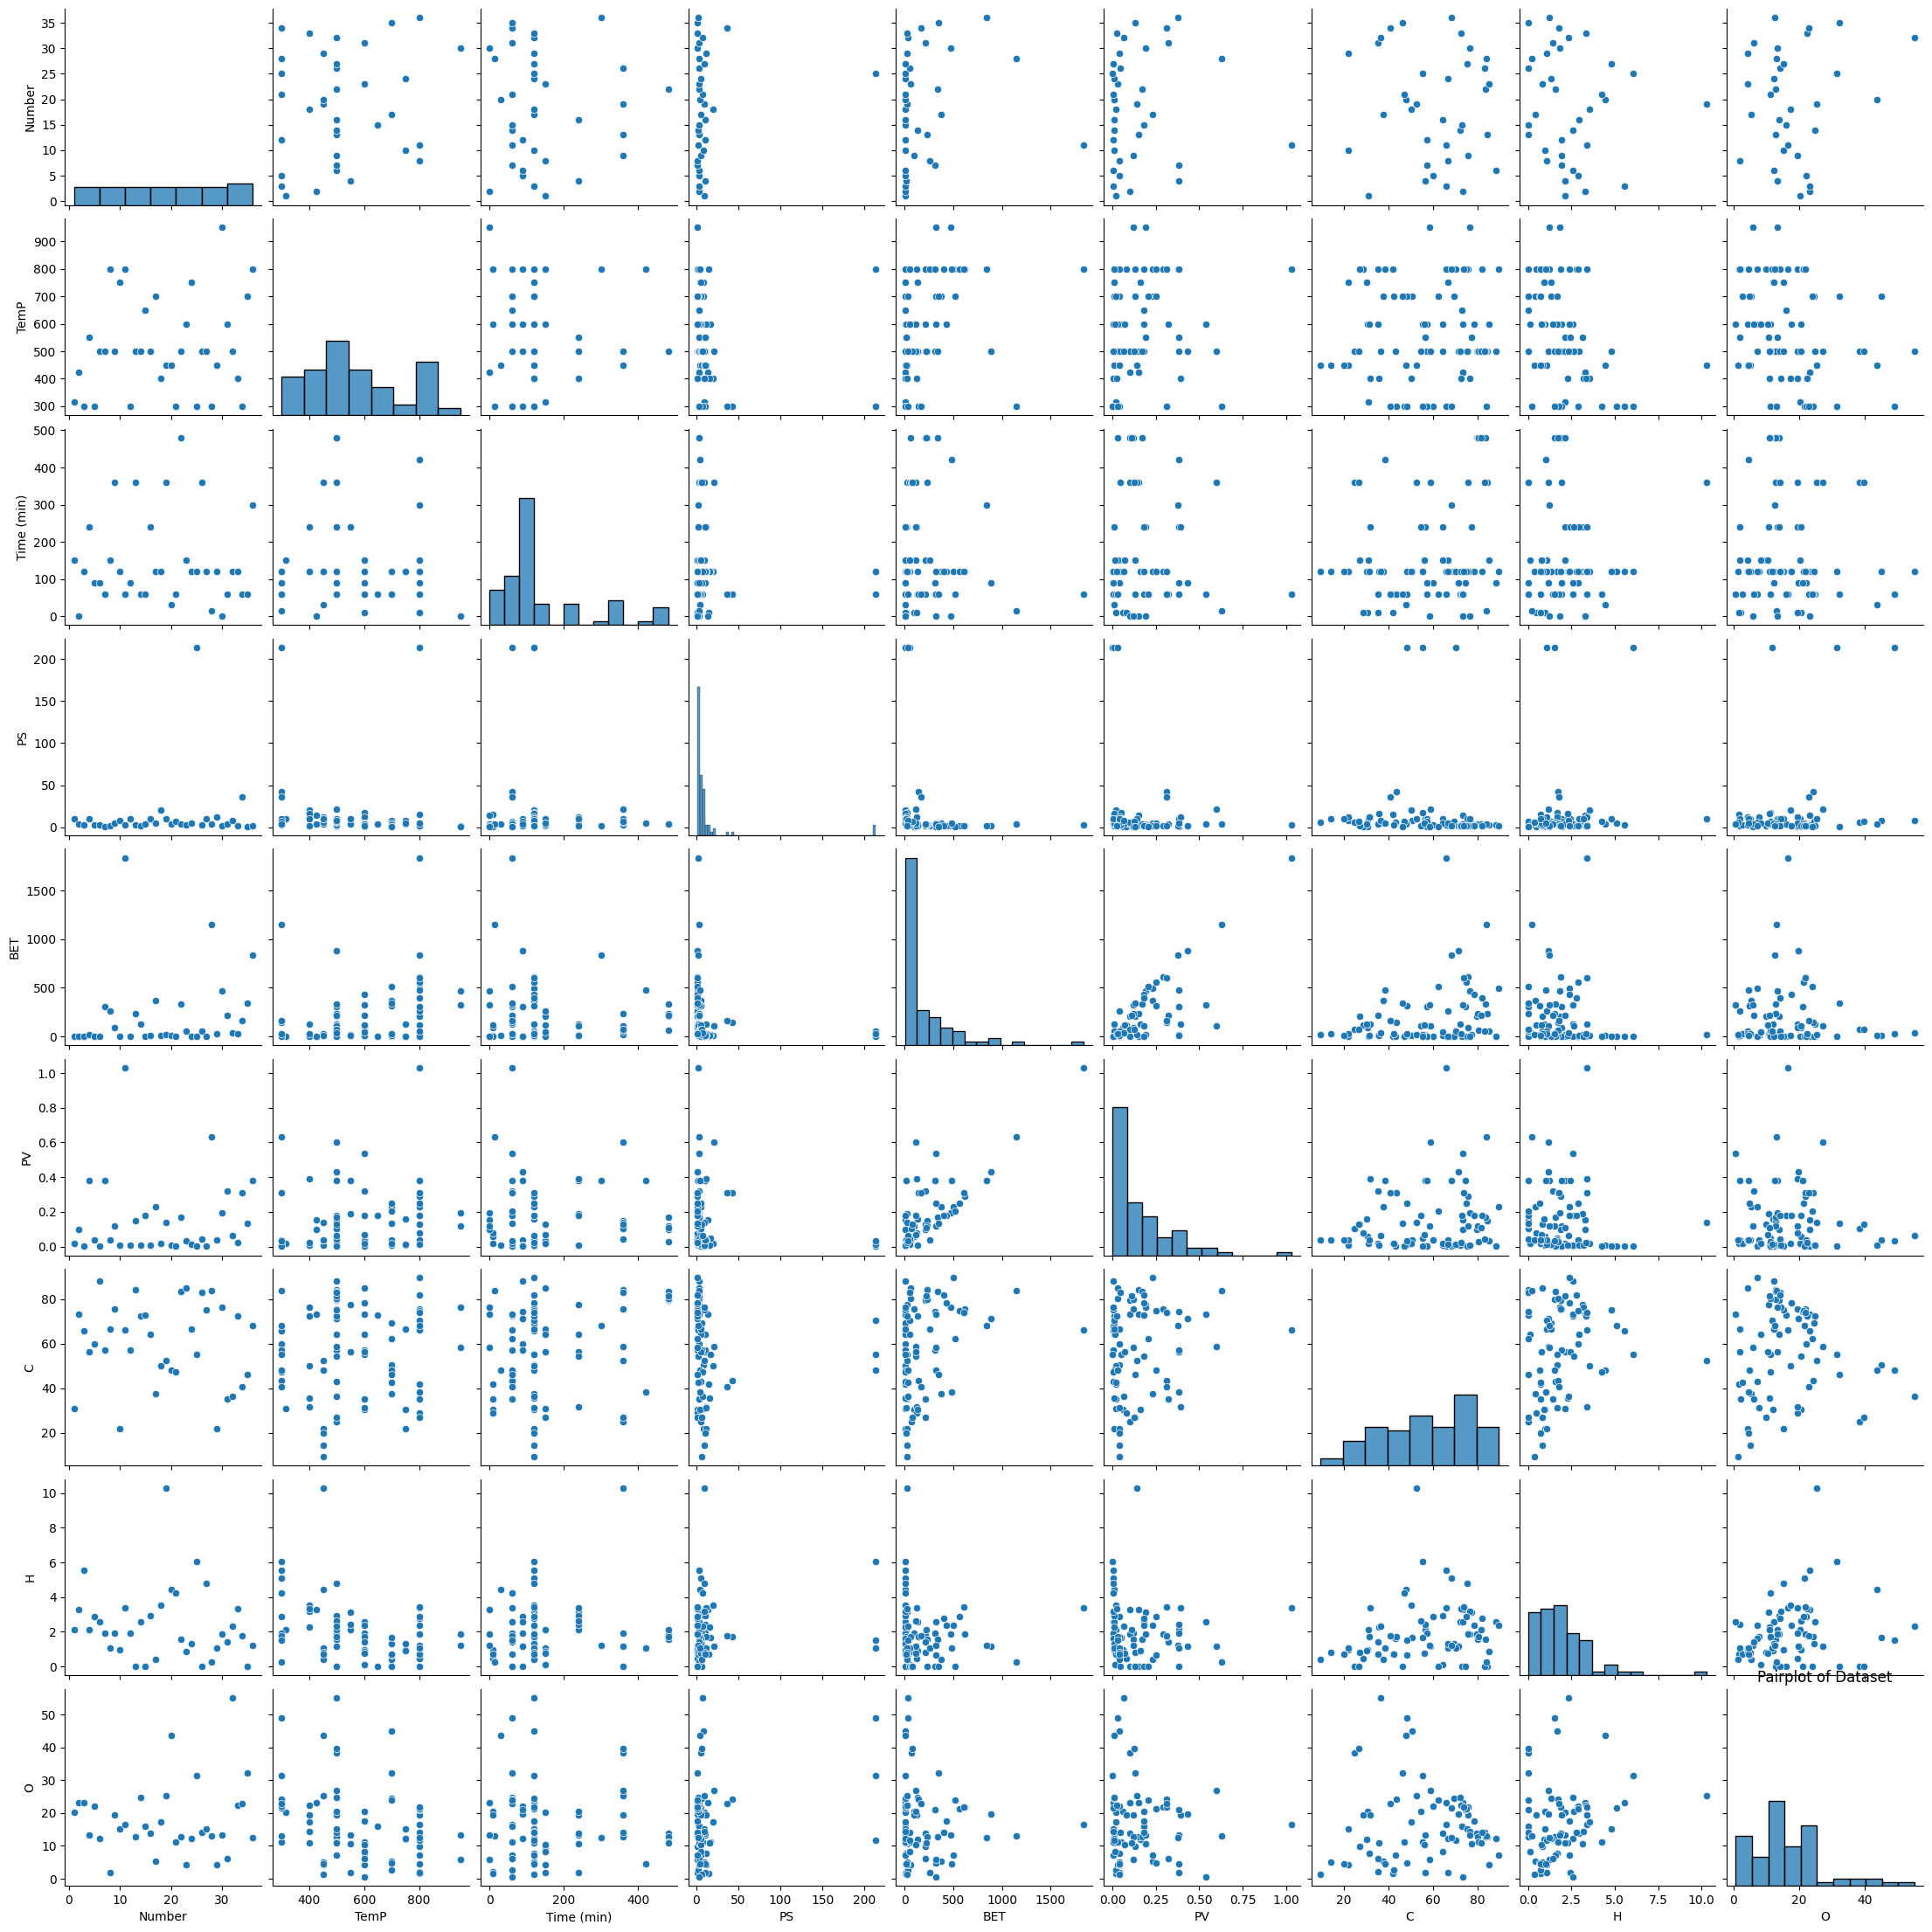

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.title('Pairplot of Dataset')
plt.show

Histogram

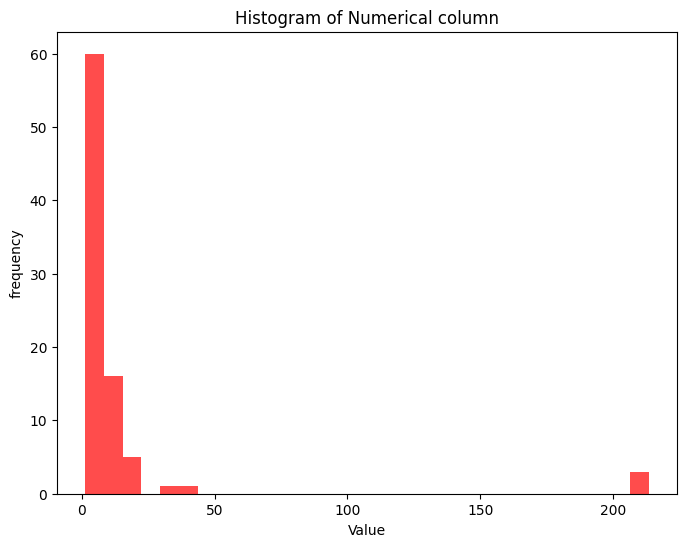

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.hist(df['PS'], bins=30, alpha=0.7, color='red')
plt.title('Histogram of Numerical column')
plt.xlabel('Value')
plt.ylabel('frequency')
plt.show()